In [2]:
import tensorflow as tf
import numpy as np
from pickle import load
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
from skimage import transform

dictClassTrain = {}
dictLabelTrain = {}
dictClassTest = {}
dictLabelTest = {}


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#x_train = transform.resize(x_train, (len(x_train), 32, 32, 1))

x_train_list = x_train.tolist()
y_train_list = y_train.tolist()

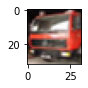

(32, 32, 3)


In [4]:
image = x_train[357]
#fig = plt.figure
#plt.imshow(image, cmap='gray')
plt.rcParams["figure.figsize"] = (1,1)
plt.imshow(image)
plt.show()
print(image.shape)

In [55]:
from augment_data import *

dictClassTrain['class1Train'] = [x_train[354],x_train[355]]
dictLabelTrain['class1TrainLabel'] = [y_train[354],y_train[355]]

print(len(dictClassTrain['class1Train']))

# Augment the dataset
dictClassTrain['class1Train'], dictClassTrain['class1TrainLabel'] = augment_dataset(dictClassTrain['class1Train'], dictLabelTrain['class1TrainLabel'])

print(len(dictClassTrain['class1Train']))

2
8


[[183. 167. 185.]
 [159. 133. 127.]
 [187. 140. 111.]
 [231. 183. 146.]
 [195. 151. 116.]
 [120.  86.  75.]
 [166. 109.  74.]
 [148.  97.  72.]
 [164. 105.  75.]
 [151. 105.  79.]
 [151. 105.  79.]
 [184. 131. 101.]
 [169. 111.  86.]
 [191. 136.  96.]
 [219. 155. 107.]
 [232. 173. 123.]
 [206. 146. 106.]
 [232. 186. 150.]
 [232. 186. 150.]
 [236. 209. 174.]
 [235. 194. 156.]
 [239. 194. 155.]
 [237. 169. 118.]
 [196. 129.  89.]
 [150.  95.  76.]
 [182. 116.  81.]
 [154.  87.  57.]
 [169. 105.  75.]
 [158.  98.  59.]
 [173. 110.  67.]
 [200. 132.  90.]
 [184. 133. 117.]]


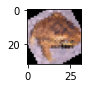

In [65]:
image = dictClassTrain['class1Train'][4]
plt.rcParams["figure.figsize"] = (1,1)
print(image[16])
plt.imshow((image).astype(np.uint8))
plt.show()

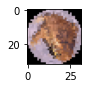

In [76]:
newImage = np.asarray(tfa.image.rotate(image, tf.constant(5*np.pi/3)),dtype=np.uint8)
plt.rcParams["figure.figsize"] = (1,1)
plt.imshow(newImage)
plt.show()

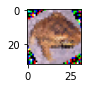

In [86]:
noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.5,dtype=tf.float32)
image = np.asarray(image+noise,dtype=np.uint8)
plt.rcParams["figure.figsize"] = (1,1)
plt.imshow(image)
plt.show()

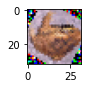

In [87]:
img = tf.image.flip_up_down(image)
plt.rcParams["figure.figsize"] = (1,1)
plt.imshow(img)
plt.show()